In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

####**TASK I**

In [2]:
data=pd.read_csv(r'/content/Admission_Predict.csv',header=1,index_col=0)
data.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.shape

(400, 8)

In [4]:
print(data.columns)
data.isna().sum(axis=0)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
##shuffling data to using sample function
data.sample(frac = 1,random_state=10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
333,308,106,3,3.5,2.5,8.21,1,0.75
112,321,109,4,4.0,4.0,8.68,1,0.69
353,303,100,2,3.0,3.5,8.06,1,0.64
206,295,99,2,2.5,3.0,7.65,0,0.57
57,316,102,3,2.0,3.0,7.40,0,0.64
...,...,...,...,...,...,...,...,...
370,301,98,1,2.0,3.0,8.03,1,0.67
321,317,106,3,4.0,3.5,8.50,1,0.75
16,314,105,3,3.5,2.5,8.30,0,0.54


In [6]:
#input features and target variable are stored in separate variables X and Y

X=data.drop(labels=['Chance of Admit '],axis=1)
Y=data['Chance of Admit ']
print(X.shape,Y.shape)

(400, 7) (400,)


In [7]:
#generatng training set size =70%
train_size=int(X.shape[0]*0.7)

train_X=X[:train_size]
train_Y=Y[:train_size]

test_size=X.shape[0]-train_size
test_X=X[train_size:]
test_Y=Y[train_size:]
print(train_X.shape,test_X.shape,train_Y.shape,test_Y.shape)

(280, 7) (120, 7) (280,) (120,)


####1. Feature Normalization

In [8]:
#Normalizing the feature values to standard normal form
train_X=(train_X-train_X.mean())/train_X.std()

test_X=(test_X-test_X.mean())/test_X.std()


##### 2. Solution using Closed form formula


In [10]:
def MSE(predicted_y,labels):
  m=predicted_y.shape[0]
  predicted_y=predicted_y
  Loss= np.round(np.dot((predicted_y- labels).transpose(),predicted_y-labels),6)
  Mean_sq_error = Loss[0][0]/(m)
  return Mean_sq_error

In [11]:
class close_form:
  
  def fit(self,input_features, target):
    n=input_features.shape[0]
    m=input_features.shape[1]
    input_features=np.array(input_features).reshape(n,m)
    ones=np.array([1]*n).reshape(n,1)
    X=np.append(ones,input_features,axis=1)
    target=np.array(target).reshape(n,1)
    self.theta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,target)) 
    

  def closed_form_predict(self,input_features):
    n=input_features.shape[0]
    m=input_features.shape[1]
    input_features=np.array(input_features).reshape(n,m)
    ones=np.array([1]*n).reshape(n,1)
    X=np.append(ones,input_features,axis=1)
    new_predictions=np.dot(X,self.theta)
    return new_predictions

In [12]:
from sklearn.metrics import mean_squared_error

model=close_form()
model.fit(train_X, train_Y)
pred_Y=model.closed_form_predict(test_X)
print("coefficientss obtained by Closed form : \n",model.theta[0:])

print("MSE:\t",mean_squared_error(pred_Y,test_Y))

coefficientss obtained by Closed form : 
 [[ 0.72896429]
 [ 0.02130449]
 [ 0.01689003]
 [ 0.00925594]
 [-0.00551656]
 [ 0.02538239]
 [ 0.06898077]
 [ 0.01011877]]
MSE:	 0.003127488591677208


##### 3. Solution using Gradient Descent

In [14]:
#Gradient descent Model built by using features as vectors
#so can be used for varying number of features i.e for both simple and multiple case it works

class gradient_descent:
  def fit_to_grad(self,input_data, labels, learning_rate,epochs):
    m = input_data.shape[0]
    k=input_data.shape[1]
    n=epochs
    initial_params=np.array([0.0]*(k+1))
    thetas=np.array(initial_params).reshape(k+1,1)
    labels=np.array(labels).reshape(m,1)
    ones=np.array([1]*m).reshape(m,1)
    input_data=np.array(input_data).reshape(m,k)
    X1=np.append(ones,input_data,axis=1)
    ct=1
    for i in range(n):
        predicted_y = np.dot(X1,thetas)
        gradient=thetas-ct*( np.round(np.dot(X1.transpose(),(labels-predicted_y)),5))
        new_thetas=thetas-(gradient*2*learning_rate/(m))
        thetas=new_thetas
    #print(thetas)
    self.thetas=thetas
    return self.thetas

  def predict(self,input_data):
    m=input_data.shape[0]
    n=input_data.shape[1]
    ones=np.array([1]*m).reshape(m,1)
    input_data=np.array(input_data).reshape(m,n)
    X1=np.append(ones,input_data,axis=1)
    
    predicted_y = np.dot(X1,self.thetas)
    return predicted_y 



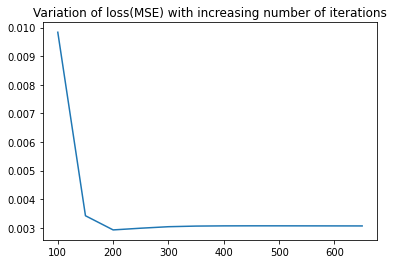

In [15]:
learning_rate=0.01
itrs=range(100,700,50)
itrs_loss=[]

plt.title("Variation of loss(MSE) with increasing number of iterations")
for k in itrs:
  grad_model=gradient_descent()
  grad_model.fit_to_grad(train_X, train_Y,learning_rate,k)
  y_pred=grad_model.predict(test_X)
  itrs_loss.append(mean_squared_error(y_pred,test_Y))
plt.plot(itrs,itrs_loss)
plt.show()

In [16]:
grad_model=gradient_descent()
grad_model.fit_to_grad(train_X, train_Y,0.01,200)

print("\nCoefficients \n ",grad_model.thetas[:])

y_pred=grad_model.predict(test_X)
#calculating MSE by loss function
print("Mean squared Error obtained:\n",mean_squared_error(y_pred,test_Y))


Coefficients 
  [[0.71377963]
 [0.0275256 ]
 [0.02336425]
 [0.01319115]
 [0.00081592]
 [0.02397006]
 [0.04841898]
 [0.01053752]]
Mean squared Error obtained:
 0.0029226345642255984


####**TASK II**

In [226]:
dt2=pd.read_csv(r'/content/heart.csv',sep='\t',header=1)
dt2.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [227]:
dt2.shape

(303, 14)

In [228]:
print(dt2.columns)
dt2.isna().sum(axis=0)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [232]:
#generatng training set size =70%
train_size=int(X.shape[0]*0.7)
test_X=X.sample(frac=0.3,random_state=2)
test_Y=Y.filter(items = test_X.index)
train_X=X[:train_size]
train_Y=Y[:train_size]

test_size=X.shape[0]-train_size

print(train_X.shape,test_X.shape,train_Y.shape,test_Y.shape)

(212, 13) (91, 13) (212,) (91,)


####1. Feature Normalization

In [233]:
#Normalizing the feature values to standard normal form
train_X=(train_X-train_X.mean(axis=0))/train_X.std(axis=0)

test_X=(test_X-test_X.mean(axis=0))/test_X.std(axis=0)

##### 2. Solution using Closed form formula


In [234]:
from sklearn.metrics import mean_squared_error

model=close_form()
model.fit(train_X, train_Y)
pred_Y=model.closed_form_predict(test_X)
print("coefficientss obtained by Closed form : \n",model.theta[0:])
pred_Y=np.where(pred_Y<0.5, 0, 1)
print("MSE:\t",mean_squared_error(pred_Y,test_Y))

coefficientss obtained by Closed form : 
 [[ 0.77830189]
 [ 0.00156335]
 [-0.05978163]
 [ 0.10530193]
 [-0.00089527]
 [-0.01001626]
 [ 0.00418203]
 [ 0.05348633]
 [ 0.02967404]
 [-0.0440587 ]
 [-0.10099706]
 [ 0.02159781]
 [-0.08104361]
 [-0.08020756]]
MSE:	 0.21978021978021978


##### 3. Solution using Gradient Descent

In [236]:
grad_model=gradient_descent()
grad_model.fit_to_grad(train_X, train_Y,0.01,100)

print("\nCoefficients \n ",grad_model.thetas[:])

y_pred=grad_model.predict(test_X)

y_pred=np.where(y_pred<0.5, 0, 1)

print("MSE:\t",mean_squared_error(y_pred,test_Y))


Coefficients 
  [[ 0.67289869]
 [-0.00802836]
 [-0.05853059]
 [ 0.09249324]
 [-0.0018128 ]
 [-0.00582628]
 [ 0.00966418]
 [ 0.0482989 ]
 [ 0.03146325]
 [-0.05208425]
 [-0.08566821]
 [ 0.03281486]
 [-0.0743661 ]
 [-0.08025119]]
MSE:	 0.16483516483516483
